In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/block3.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [5]:
bitcoin_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [7]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [16]:
pd.to_datetime(bitcoin_train_df['day'])

0     2020-12-09
1     2020-12-10
2     2020-12-11
3     2020-12-12
4     2020-12-13
         ...    
356   2021-11-30
357   2021-12-01
358   2021-12-02
359   2021-12-03
360   2021-12-04
Name: day, Length: 361, dtype: datetime64[ns]

In [17]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.index = bitcoin_train_df['day']
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


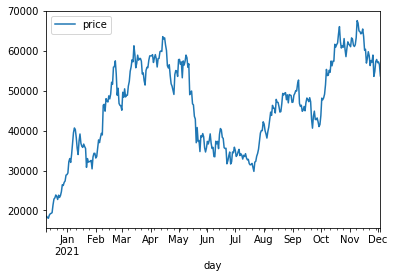

In [18]:
bitcoin_train_df.plot()
plt.show()

# ARIMA 모델

In [9]:
### ARIMA 모델 = AR + I + MA 
### AR : AutoRegression, 이전 데이터들에서 학습한 내용을 가지고 예측
### NA : Moving Average, 이전 데이터들의 오차를 반영해서 예측
### I : Defference, 차이

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [19]:
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_train_df.price.values, order = (2,1,2))
model

In [20]:
model_fit = model.fit(trend='c', full_output = True, disp = True )     # trend = 'c' 의 의미는 trend성을 부여하지 않는다. 
model_fit

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.895
Method:                       css-mle   S.D. of innovations           1882.640
Date:                Fri, 10 Dec 2021   AIC                           6463.790
Time:                        01:40:51   BIC                           6487.107
Sample:                             1   HQIC                          6473.062
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.3396     99.476      0.989      0.324     -96.630     293.309
ar.L1.D.y      0.9184      0.040     23.086      0.000       0.840       0.996
ar.L2.D.y     -0.9440      0.032    -29.397      0.000      -1.007      -0.881
ma.L1.D.y     -0.9573      0.025    -38.369      0.000      -1.006      -0.908
ma.L2.D.y      0.9855      0.026     38.256      0.000       0.935       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4865           -0.9070j            1.0292           -0.1716
AR.2            0.4865           +0.9070j            1.0292            0.1716
MA.1            0.4857           -0.8825j            1.0073           -0.1699
MA.2            0.4857           +0.8825j            1.0073            0.1699
-----------------------------------------------------------------------------
"""

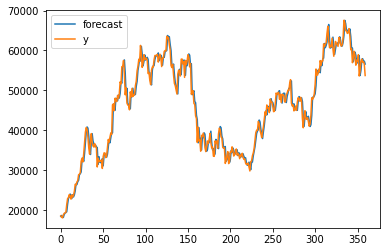

In [25]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

In [27]:
forcast_data = model_fit.forecast(steps = 5)   # 5일치를 살펴보자
forcast_data

(array([53878.45857826, 53927.91598273, 53918.79329405, 53964.57835171,
        54116.09218292]),
 array([1882.64045638, 2611.29303477, 3183.32694848, 3707.12614891,
        4194.32759583]),
 array([[50188.55108791, 57568.36606861],
        [48809.87568149, 59045.95628396],
        [47679.58712403, 60157.99946408],
        [46698.74461369, 61230.41208973],
        [45895.36115573, 62336.82321012]]))

In [28]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [29]:
pred_y = forcast_data[0]
pred_y

array([53878.45857826, 53927.91598273, 53918.79329405, 53964.57835171,
       54116.09218292])

## 그래프를 만들어 보자

In [31]:
pred_y = pred_y.tolist()  #list로 변경해주기
pred_y

[53878.45857826177,
 53927.9159827253,
 53918.79329405307,
 53964.57835170847,
 54116.09218292492]

In [32]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [33]:
bitcoin_test_df.price.values

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [34]:
test_y = bitcoin_test_df.price.values
test_y

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [37]:
type(test_y)

list

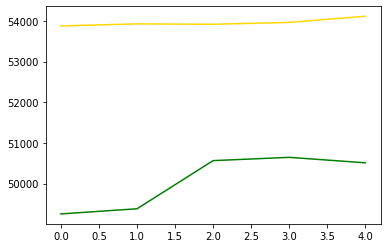

In [48]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [49]:
forcast_data[2]  

# 1. 최저[0], 최고[1] => 그래프로!
# 2. dataset의 양을 3년 이상으로 늘려보자.  

array([[50188.55108791, 57568.36606861],
       [48809.87568149, 59045.95628396],
       [47679.58712403, 60157.99946408],
       [46698.74461369, 61230.41208973],
       [45895.36115573, 62336.82321012]])

In [50]:
# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forcast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

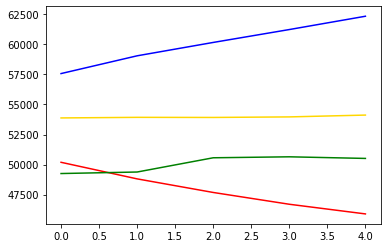

In [51]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [3]:
### Additive 모델 = ARIMA + 기간의 trend(경향성) : facebook(fb)

In [52]:
from fbprophet import Prophet

In [53]:
bitcoin_df2 = pd.read_csv(file_path, names = ['ds', 'y'])
bitcoin_df2

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [54]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

In [55]:
prophet.fit(bitcoin_df2)

In [56]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forcast_data = prophet.predict(future_data)
forcast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-12-09,2224.520601,16158.428281,20571.276925,2224.520601,2224.520601,10.589405,10.589405,10.589405,7.270101,7.270101,7.270101,-0.042453,-0.042453,-0.042453,-3.276850,-3.276850,-3.276850,0.0,0.0,0.0,18397.010913
1,2020-12-10,2245.025866,16423.963552,20658.056230,2245.025866,2245.025866,10.589405,10.589405,10.589405,7.273211,7.273211,7.273211,0.017467,0.017467,0.017467,-3.333660,-3.333660,-3.333660,0.0,0.0,0.0,18573.573214
2,2020-12-11,2265.531130,16293.188747,20711.925335,2265.531130,2265.531130,10.589405,10.589405,10.589405,7.177258,7.177258,7.177258,-0.044290,-0.044290,-0.044290,-3.367857,-3.367857,-3.367857,0.0,0.0,0.0,18525.832046
3,2020-12-12,2286.036394,16691.332840,21098.923813,2286.036394,2286.036394,10.589405,10.589405,10.589405,7.232412,7.232412,7.232412,0.021332,0.021332,0.021332,-3.378325,-3.378325,-3.378325,0.0,0.0,0.0,18819.592860
4,2020-12-13,2306.541659,16767.805036,21336.815247,2306.541659,2306.541659,10.589405,10.589405,10.589405,7.243287,7.243287,7.243287,0.018141,0.018141,0.018141,-3.364259,-3.364259,-3.364259,0.0,0.0,0.0,19013.485085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2021-12-10,6142.437574,48204.835648,52711.765037,6142.437574,6142.437574,10.589405,10.589405,10.589405,7.223587,7.223587,7.223587,-0.044290,-0.044290,-0.044290,-3.321528,-3.321528,-3.321528,0.0,0.0,0.0,50512.869646
367,2021-12-11,6183.302817,48817.718770,53332.850243,6183.302817,6183.302817,10.589405,10.589405,10.589405,7.249243,7.249243,7.249243,0.021332,0.021332,0.021332,-3.361494,-3.361494,-3.361494,0.0,0.0,0.0,51007.566222
368,2021-12-12,6224.168061,48814.985935,53489.985789,6223.479219,6224.168061,10.589405,10.589405,10.589405,7.229564,7.229564,7.229564,0.018141,0.018141,0.018141,-3.377982,-3.377982,-3.377982,0.0,0.0,0.0,51222.189345
369,2021-12-13,6265.033305,49098.531552,53942.046211,6232.292414,6276.271070,10.589405,10.589405,10.589405,7.229249,7.229249,7.229249,0.009951,0.009951,0.009951,-3.370107,-3.370107,-3.370107,0.0,0.0,0.0,51556.521793


In [57]:
forcast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48204.835648,52711.765037
367,2021-12-11,51007.566222,48817.718770,53332.850243
368,2021-12-12,51222.189345,48814.985935,53489.985789
369,2021-12-13,51556.521793,49098.531552,53942.046211
370,2021-12-14,52161.984803,49561.391620,54608.863835


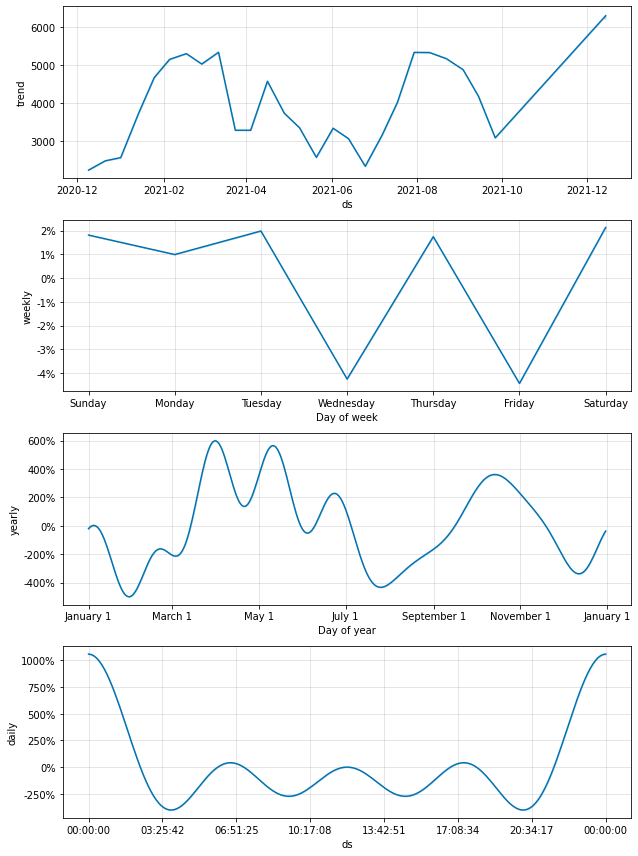

In [59]:
fig2 = prophet.plot_components(forcast_data)